In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train2 = df_train.drop(["PassengerId", "Pclass", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1)

In [9]:
df_train2.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [10]:
df_test2 = df_test.drop(["PassengerId", "Pclass", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1)

In [11]:
df_test2.head()

,Sex,Age,Fare
0,male,34.5,7.8292
1,female,47.0,7.0000
2,male,62.0,9.6875
3,male,27.0,8.6625
4,female,22.0,12.2875


In [14]:
df_train3 = df_train2.replace("male", 0).replace("female", 1)

In [15]:
df_test3 = df_test2.replace("male", 0).replace("female", 1)

In [16]:
print(df_train3.isnull().sum())
print(df_test3.isnull().sum())

Survived      0
Sex           0
Age         177
Fare          0
dtype: int64
Sex      0
Age     86
Fare     1
dtype: int64


In [19]:
df_train3["Age"] = df_train3["Age"].fillna(df_train3["Age"].median())

In [20]:
df_test3["Age"] = df_test3["Age"].fillna(df_test3["Age"].median())

In [24]:
print(df_train3.isnull().sum())
print(df_test3.isnull().sum())
print(df_train3.shape)
print(df_test3.shape)

Survived    0
Sex         0
Age         0
Fare        0
dtype: int64
Sex     0
Age     0
Fare    1
dtype: int64
(891, 4)
(418, 3)


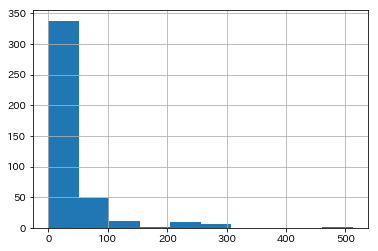

In [22]:
df_test3["Fare"].hist()

In [25]:
# ヒストグラムの分布で外れ値が何個か、、
# Fareの欠損値が含まれている行（1行のみなので）を削除
df_test4 = df_test3.dropna(how="all")

In [26]:
print(df_test3.isnull().sum())

Sex     0
Age     0
Fare    1
dtype: int64


In [27]:
# 欠損値ではなく空白ですね、、、
# しかたがないので欠損値を中央値で補完することに、つかうデータフレームもdf_test3のままに
df_test3["Fare"] = df_test3["Fare"].fillna(df_test3["Fare"].median())

In [28]:
print(df_test3.isnull().sum())

Sex     0
Age     0
Fare    0
dtype: int64


In [29]:
# 数値型への変換、欠損値の補完が済んだので相関を見る
df_train3.corr()

,Survived,Sex,Age,Fare
Survived,1.000000,0.543351,-0.064910,0.257307
Sex,0.543351,1.000000,-0.081163,0.182333
Age,-0.064910,-0.081163,1.000000,0.096688
Fare,0.257307,0.182333,0.096688,1.000000


In [ ]:
# Sexのみ関係ありそう、、（Fareの0.2は弱い、、）
# 特徴量としてSexのみを扱うことにする

In [31]:
# 特徴量選択の前に、、、
# pandasのDataFrameはそのままではscikit-learnに渡せない。
# 数値データではないカラムへの対処、数値データのnumpy.ndarrayへの変換が必要らしい
# 数値データへの変換は完了済み
# 最後にvaluesメソッドを使うことでnumpy.ndarrayに変換可能
train_data = df_train3.values


# これまでtrain_dataではなく、、、データフレームのままのdf_train,,,の特徴量を選択していた、、、間違いだよね、、なぜエラーなく通った？
# 変換しなくでもできるのでは？

In [76]:
# 特徴量選択
# ミス→train_X = df_train3[["Sex", "Fare"]]
# trainX = train_data["Sex"] だとエラー、すでにnumpy.ndarray型だから？
trainX = train_data[:, 1:]

In [77]:
trainY = train_data[:, 0]

In [78]:
from sklearn.svm import SVC

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
# モデル選択 今回はLogisticRegression() →Expected 2D array, got 1D array insteadとエラー　特徴量1つではロジスティック回帰はできないかも
# SVC()も同じエラー、、
# clf = DecisionTreeClassifier(max_depth=3, random_state=0)もエラー 特徴量１つではどのアルゴリズムもダメか、、
# LRの場合、、Survivedが0or1ではなく小数点のものが出てしまう
clf = SVC()

In [90]:
clf = clf.fit(trainX, trainY)

In [91]:
# 学習終了
# ここから予測

In [92]:
# pandasのDataFrameはそのままではscikit-learnに渡せない。
# 数値データではないカラムへの対処、数値データのnumpy.ndarrayへの変換が必要らしい
# 数値データへの変換は完了済み
# 最後にvaluesメソッドを使うことでnumpy.ndarrayに変換可能
test_data = df_test3.values

In [93]:
testX = test_data[:, 0:]

In [94]:
testY = clf.predict(testX)

In [95]:
output = pd.read_csv("test.csv")

In [96]:
output["Survived"] = testY

In [97]:
output[["PassengerId","Survived"]].to_csv("output_submission_180502_1.csv",index=False)

In [ ]:
# ---これで終了。カレントディレクトリに出力されたoutput_submission_180502_1.csvファイルをkaggleに提出→正解率は0.74641と前回と全く同じ
